## Mini Project

In [1]:
import torch
import numpy as np

### Load Dataset - MNIST

In [2]:
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose([
transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, 
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, 
                                          shuffle=False, num_workers=2)

In [4]:
len(trainset),len(testset)

(60000, 10000)

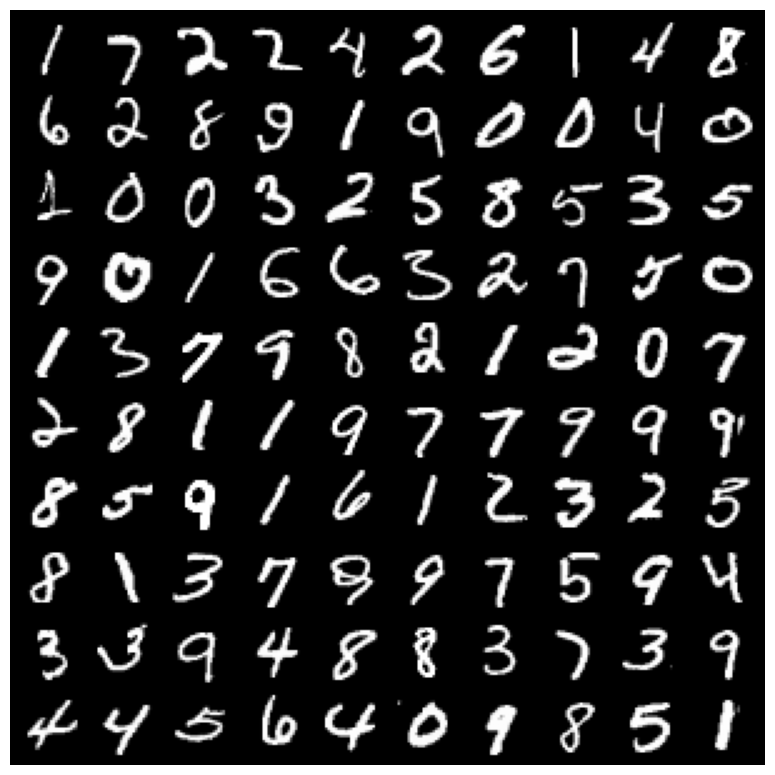

In [5]:
import matplotlib.pyplot as plt

dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images[:100,:,:,:]
images = images / 2 + 0.5
plt.figure(figsize=(10,10),dpi=100)
plt.imshow(np.transpose(torchvision.utils.make_grid(images,nrow=10).numpy(),(1,2,0)))
plt.axis('off')
plt.show()

## Feature Extraction - scattering net

### scattering net with known invariants

In [6]:
from kymatio import Scattering2D

scattering = Scattering2D(J=2, shape=(28, 28), max_order=1)
K = 17
scattering = scattering.cuda()

d:\program\python\lib\site-packages\kymatio\frontend\entry.py:21: DeprecationWarning: Torch frontend is currently the default, but NumPy will become the default in the next version.
  " version.", DeprecationWarning)


In [7]:
Sdata = np.zeros((len(trainset),833)) # 17*7*7
Slabel = np.zeros((len(trainset),1))
Sdata.shape, Slabel.shape

((60000, 833), (60000, 1))

In [8]:
batch_size=100
for batch_idx, (data, target) in enumerate(trainloader):
    print(batch_idx,end=',')
    data = data.to('cuda')
    sdata = scattering(data)
    Sdata[batch_size*batch_idx:(batch_idx+1)*batch_size,:] = sdata.to('cpu').numpy().reshape(batch_size,-1)
    Slabel[batch_size*batch_idx:(batch_idx+1)*batch_size,:] = target.numpy().reshape(batch_size,-1)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,27

In [9]:
test = scattering(data).to('cpu').numpy()[0]

In [10]:
test.shape

(1, 17, 7, 7)

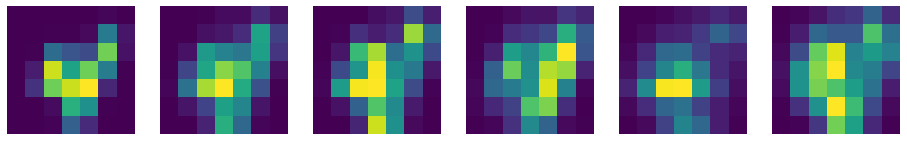

In [11]:
plt.figure(figsize=(16,2.5))
plt.subplot(161)
plt.imshow(test[0,0,:,:])
plt.axis('off')
plt.subplot(162)
plt.imshow(test[0,3,:,:])
plt.axis('off')
plt.subplot(163)
plt.imshow(test[0,6,:,:])
plt.axis('off')
plt.subplot(164)
plt.imshow(test[0,9,:,:])
plt.axis('off')
plt.subplot(165)
plt.imshow(test[0,12,:,:])
plt.axis('off')
plt.subplot(166)
plt.imshow(test[0,15,:,:])
plt.axis('off')
plt.show()

## Visualize

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.style as style 
import matplotlib.pyplot as plt
import matplotlib
style.use('seaborn-whitegrid')
matplotlib.rcParams['font.family'] = "sans-serif"

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### PCA of scattering net

In [13]:
Sdata_pca_embedded = PCA(n_components=2).fit_transform(Sdata)  
Sdata_pca_embedded.shape

(60000, 2)

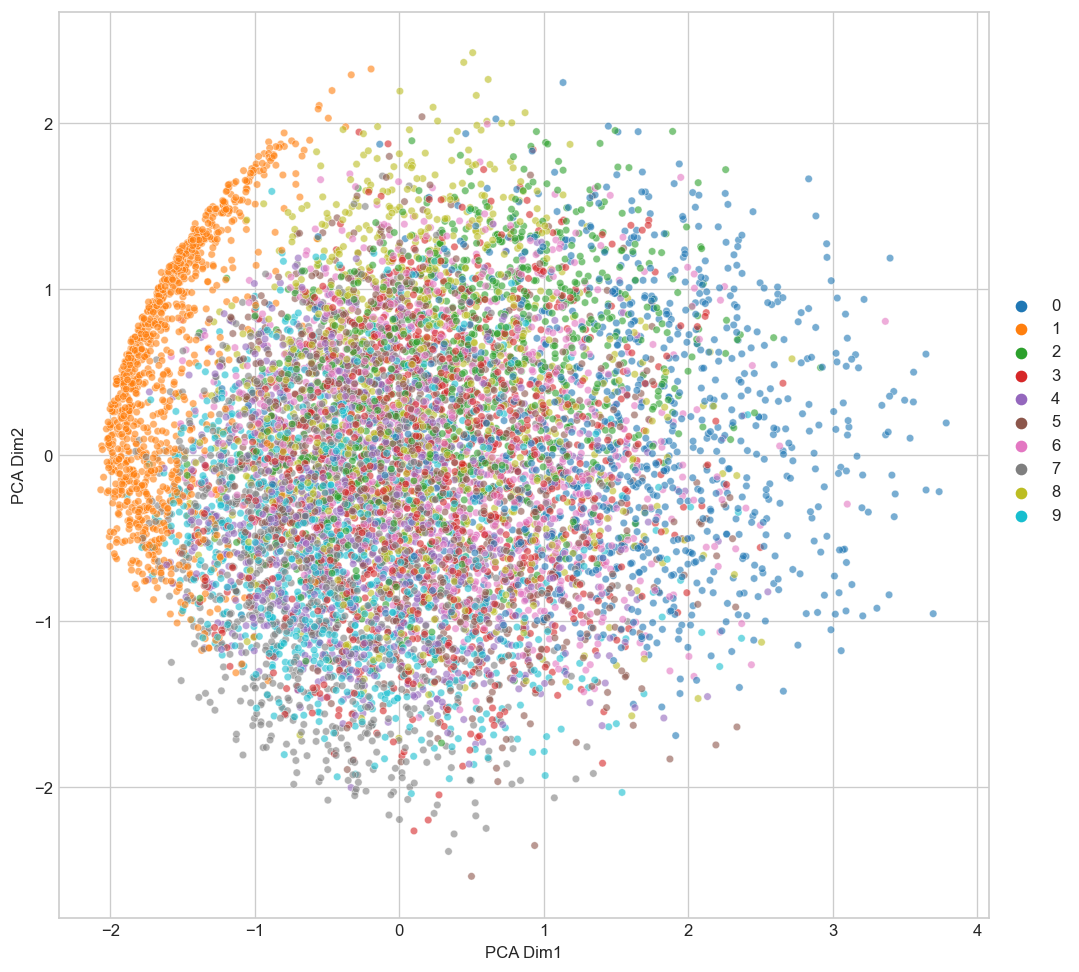

In [14]:
Sdata_pca_embedded_df = pd.DataFrame(Sdata_pca_embedded,index=Slabel)
Sdata_pca_embedded_df = Sdata_pca_embedded_df.reset_index()
Sdata_pca_embedded_df['index'] = Sdata_pca_embedded_df['index'].astype(int)
Sdata_pca_embedded_df_plot = Sdata_pca_embedded_df.loc[range(10000),:]
Sdata_pca_embedded_df_plot.columns = ['Label','PCA Dim1', 'PCA Dim2']
plt.figure(figsize=(10,10),dpi=120)
ax = sns.scatterplot(x='PCA Dim1', y='PCA Dim2',hue='Label',data=Sdata_pca_embedded_df_plot,
                     palette='tab10',alpha=0.6,s=20,legend='full')
legend = plt.legend(bbox_to_anchor=(1.001, 0.7),facecolor='white',edgecolor='white')
plt.show()

### tSNE of scattering net

In [ ]:
Sdata_tsne_embedded = TSNE(n_components=2).fit_transform(Sdata)
# Sdata_tsne_embedded.shape

In [ ]:
Sdata_tsne_embedded_df = pd.DataFrame(Sdata_tsne_embedded,index=Slabel)
Sdata_tsne_embedded_df = Sdata_tsne_embedded_df.reset_index()
Sdata_tsne_embedded_df['index'] = Sdata_tsne_embedded_df['index'].astype(int)
Sdata_tsne_embedded_df_plot = Sdata_tsne_embedded_df.loc[range(10000),:]
Sdata_tsne_embedded_df_plot.columns = ['Label','tSNE Dim1', 'tSNE Dim2']
plt.figure(figsize=(10,10),dpi=120)
ax = sns.scatterplot(x='tSNE Dim1', y='tSNE Dim2',hue='Label',data=Sdata_tsne_embedded_df_plot,
                     palette='tab10',alpha=0.6,s=20,legend='full')
legend = plt.legend(bbox_to_anchor=(1.001, 0.7),facecolor='white',edgecolor='white')
plt.show()

### Feature extraction by AlexNet

In [28]:
import torchvision.models as models

In [29]:
alexnet = models.alexnet(pretrained=True)
alexnet.to('cuda')
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [30]:
normalize = transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
grey2rgb = transforms.Lambda(lambda x: x.repeat(3, 1, 1))


transform_pretrain = transforms.Compose([transforms.Resize((224, 224),interpolation=2),
                                         transforms.ToTensor(),
                                         grey2rgb,
                                         normalize
                                         ])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=False, transform=transform_pretrain)
batch_size = 20
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, 
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=False, transform=transform_pretrain)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, 
                                          shuffle=False, num_workers=2)

In [31]:
Alexdata = np.zeros((1000,256*6*6)) 
Alexlabel = np.zeros((1000,1))
Alexdata.shape,Alexlabel.shape

((1000, 9216), (1000, 1))

In [32]:
##
# only use first 1000 data as example
##

for batch_idx, (data, target) in enumerate(trainloader):
    print(batch_idx,end=',')
    if batch_idx == 1000/batch_size:
        break
    data = data.to('cuda')
    sdata = alexnet.features[:13](data)
    Alexdata[batch_size*batch_idx:(batch_idx+1)*batch_size,:] = \
        sdata.detach().to('cpu').numpy().reshape(batch_size,-1)
    Alexlabel[batch_size*batch_idx:(batch_idx+1)*batch_size,:] = target.numpy().reshape(batch_size,-1)

PicklingError: Can't pickle <function <lambda> at 0x00000295926E74C8>: attribute lookup <lambda> on __main__ failed

In [25]:
Alexdata_pca_embedded = PCA(n_components=2).fit_transform(Alexdata)
Alexdata_pca_embedded_df = pd.DataFrame(Alexdata_pca_embedded,index=Alexlabel)
Alexdata_pca_embedded_df = Alexdata_pca_embedded_df.reset_index()  
Alexdata_pca_embedded_df['index'] = Alexdata_pca_embedded_df['index'].astype(int)
Alexdata_pca_embedded_df_plot = Alexdata_pca_embedded_df
Alexdata_pca_embedded_df_plot.columns = ['Label','PCA Dim1', 'PCA Dim2']

d:\program\python\lib\site-packages\sklearn\decomposition\_pca.py:545: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


In [26]:
Alexdata_tsne_embedded = TSNE(n_components=2).fit_transform(Alexdata)
Alexdata_tsne_embedded_df = pd.DataFrame(Alexdata_tsne_embedded,index=Alexlabel)
Alexdata_tsne_embedded_df = Alexdata_tsne_embedded_df.reset_index()
Alexdata_tsne_embedded_df['index'] = Alexdata_tsne_embedded_df['index'].astype(int)
Alexdata_tsne_embedded_df_plot = Alexdata_tsne_embedded_df
Alexdata_tsne_embedded_df_plot.columns = ['Label','tSNE Dim1', 'tSNE Dim2']

NameError: name 'TSNE' is not defined

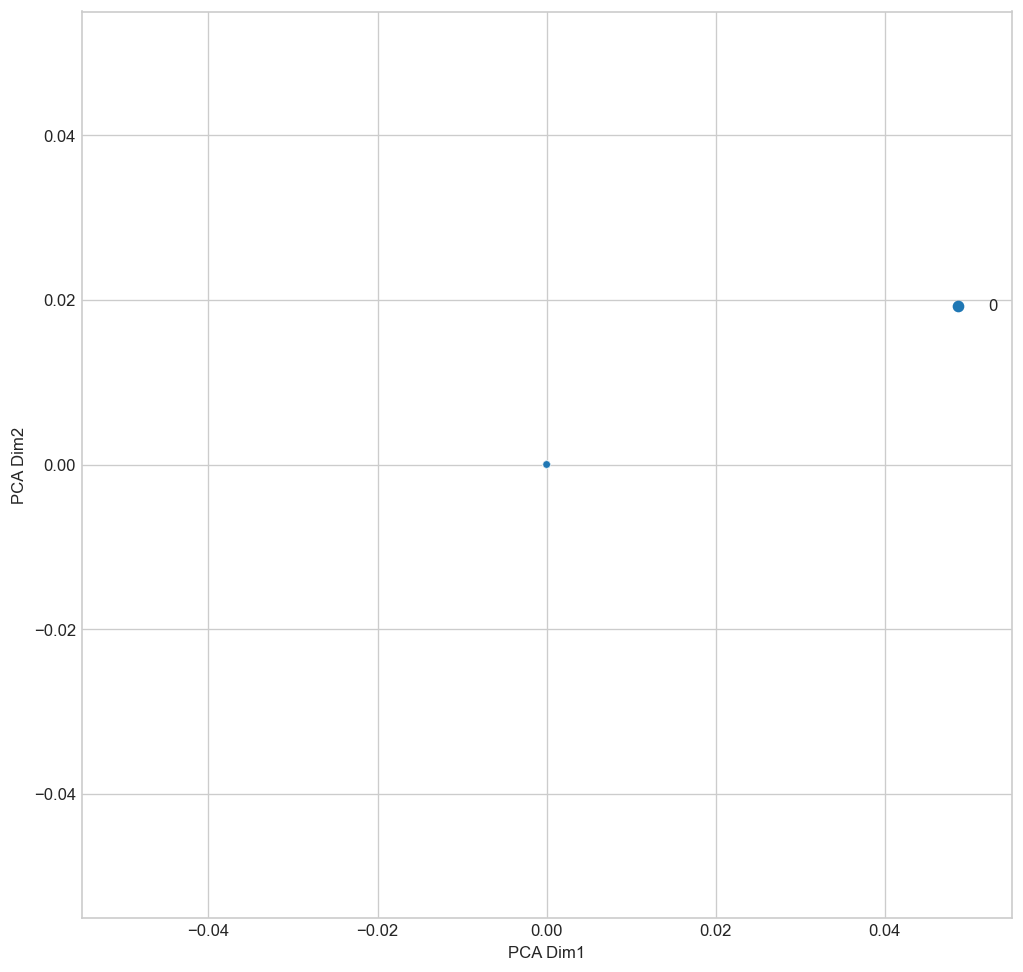

In [27]:
plt.figure(figsize=(10,10),dpi=120)
ax = sns.scatterplot(x='PCA Dim1', y='PCA Dim2',hue='Label',data=Alexdata_pca_embedded_df_plot,
                     palette='tab10',alpha=0.6,s=20,legend='full')
legend = plt.legend(bbox_to_anchor=(1.001, 0.7),facecolor='white',edgecolor='white')
plt.show()

In [ ]:
plt.figure(figsize=(10,10),dpi=120)
ax = sns.scatterplot(x='tSNE Dim1', y='tSNE Dim2',hue='Label',data=Alexdata_tsne_embedded_df_plot,
                     palette='tab10',alpha=0.6,s=20,legend='full')
legend = plt.legend(bbox_to_anchor=(1.001, 0.7),facecolor='white',edgecolor='white')
plt.show()